<div style="background-color: white; color: black; font-family: 'Times New Roman', serif; padding: 50px; max-width: 450px; margin: auto; border: 1px solid #ccc; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
  <div align="center">
    <img src="Imagenes/ugr_escudo_sin.png" alt="Escudo UGR" style="height: 120px;"><br><br>
    <h2 style="margin-bottom: 0;">Universidad de Granada</h2>
    <h3 style="margin-top: 0;">TRABAJO FIN DE GRADO</h3>
    <p style="font-variant: small-caps; font-size: 14px;">
      Doble Grado en Ingeniería Informática y Administración y Dirección de Empresas
    </p>
    <hr style="width: 60%; border: 1px solid black;">
    <h2 style="font-size: 20px;">
      Análisis y Optimización de<br>
      Rutas Aéreas Comerciales<br>
      mediante Ciencia de Datos
    </h2>
    <hr style="width: 60%; border: 1px solid black;">
    <br>
    <p><strong>Autor</strong><br>José Antonio Fernández Aranda</p>
    <p><strong>Director</strong><br>Jorge Casillas Barranquero</p>
    <p><strong><br>Análisis Vuelos - Turismo - CO2</strong></p>
    <br><br>
    <div style="display: flex; justify-content: center; align-items: center; gap: 80px; flex-wrap: wrap;">
      <img src="https://etsiit.ugr.es/sites/centros/etsiit/public/template-extra/etsiit-logo.png" alt="Logo ETSIIT" style="height: 100px;">
      <img src="Imagenes/logo_decsai.png" alt="Logo DECSAI" style="height: 100px;">
    </div>
    <br>
    <p style="font-size: 14px;">
      Escuela Técnica Superior de Ingenierías Informática y de Telecomunicación<br>
      —<br>
      Granada, a 8 de junio de 2025
    </p>
  </div>
</div>

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética general
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

### Carga de los datos 

In [2]:
# Cargar datasets
df1 = pd.read_excel("Vuelos_datos/3_vuelos_con_duracion_CALCULADO.xlsx")
df2 = pd.read_excel("Vuelos_datos/vuelos_con_duracion_CALCULADO.xlsx")

# Unir ambos datasets
df_vuelos = pd.concat([df1, df2], ignore_index=True)

# Normalizar nombres de columnas
df_vuelos.columns = df_vuelos.columns.str.strip().str.lower().str.replace(" ", "_")

# Asegurar tipo en mayúsculas
df_vuelos["tipo"] = df_vuelos["tipo"].astype(str).str.strip().str.upper()

# Vista previa
df_vuelos.head()


,ident,tipo,origen,destino,salida,llegada_estimada,aerolínea,fecha_salida,hora_salida,zona_horaria_salida,fecha_llegada,hora_llegada,zona_horaria_llegada,salida_datetime,llegada_datetime,duración_(min),duración_(hh:mm)
0,DAL1002,B739,El Paso Intl (KELP),Int'l Hartsfield-Jackson (KATL),mié 01:16PM MDT,mié 05:57PM EDT,DAL,mié,01:16PM,MDT,mié,05:57PM,EDT,2025-03-20 13:16:00,2025-03-20 21:57:00,521.0,08:41
1,DAL1004,B739,Int'l de Albuquerque Sunport (KABQ),Int'l Hartsfield-Jackson (KATL),mié 11:33AM MDT,mié 04:02PM EDT,DAL,mié,11:33AM,MDT,mié,04:02PM,EDT,2025-03-20 11:33:00,2025-03-20 20:02:00,509.0,08:29
2,DAL1005,B739,Int'l Hartsfield-Jackson (KATL),Int'l de Detroit (KDTW),mié 03:21PM EDT,mié 04:55PM EDT,DAL,mié,03:21PM,EDT,mié,04:55PM,EDT,2025-03-20 19:21:00,2025-03-20 20:55:00,94.0,01:34
3,DAL1012,A320,Int'l de Detroit (KDTW),Int'l de Austin-Bergstrom (KAUS),mié 03:19PM EDT,mié 04:59PM CDT,DAL,mié,03:19PM,EDT,mié,04:59PM,CDT,2025-03-20 19:19:00,2025-03-20 21:59:00,160.0,02:40
4,DAL1013,B712,Int'l Hartsfield-Jackson (KATL),Pensacola Intl (KPNS),mié 03:03PM EDT,mié 02:49PM CDT,DAL,mié,03:03PM,EDT,mié,02:49PM,CDT,2025-03-20 19:03:00,2025-03-20 19:49:00,46.0,00:46


In [3]:
df_turismo = pd.read_csv("Datos_turisticos.csv")

# Normalizar nombres de columnas
df_turismo.columns = df_turismo.columns.str.lower().str.strip()

# Estandarizar nombre de país en mayúsculas para facilitar uniones
df_turismo['pais'] = df_turismo['pais'].str.upper()

# Vista previa
df_turismo.head()


,pais,codigo,anio,llegadas_turistas,ingresos_turisticos_usd,gasto_turismo_rel_pib,pib_total_usd
0,ESPAÑA,ESP,2015,70682867,1.141843e+11,14.773882,1.205344e+13
1,ESPAÑA,ESP,2016,40788921,2.040735e+10,1.632630,1.735029e+13
2,ESPAÑA,ESP,2017,36632483,1.885828e+10,13.192325,1.316949e+12
3,ESPAÑA,ESP,2018,18953367,1.002282e+11,4.640613,3.800134e+12
4,ESPAÑA,ESP,2019,81893497,6.392126e+10,8.922928,5.966337e+12


### Asignaciones de emisiones 

In [4]:
# Tabla de emisiones (en kg CO2 por hora de vuelo)
tabla_emisiones = pd.DataFrame({
    "tipo": ["A320", "B738", "B737", "A319", "ATR72", "CRJ900", "E190"],
    "emisiones_kg_hora": [2500, 2600, 2550, 2400, 1000, 1400, 1600]
})

# Normalización del campo tipo
tabla_emisiones["tipo"] = tabla_emisiones["tipo"].str.strip().str.upper()

# Unión con el dataframe de vuelos
df = df_vuelos.merge(tabla_emisiones, on="tipo", how="left")

# Vista rápida para comprobar la unión
df[["tipo", "emisiones_kg_hora"]].drop_duplicates().sort_values("tipo")


,tipo,emisiones_kg_hora
3354,220,NaN
3357,32S,NaN
4553,737,NaN
5080,73F,NaN
3492,73M,NaN
...,...,...
5337,SH36,NaN
3850,SR20,NaN
3654,SU95,NaN
5443,SW4,NaN


In [7]:
# Convertir duración en horas
df["duracion_horas"] = pd.to_numeric(df["duración_(min)"], errors='coerce') / 60

# Eliminar vuelos con duración negativa, nula o muy corta (< 10 minutos)
df = df[df["duracion_horas"] > 0.1667]  # 10 minutos

# Calcular emisiones estimadas
df["co2_estimado_kg"] = df["emisiones_kg_hora"] * df["duracion_horas"]

# Filtrar vuelos con estimación válida
df_emisiones = df.dropna(subset=["co2_estimado_kg"])

# Eliminar valores nulos o negativos
df_emisiones = df_emisiones[df_emisiones["co2_estimado_kg"] > 0]

# Vista previa
df_emisiones[["ident", "tipo", "duracion_horas", "co2_estimado_kg"]].head()



,ident,tipo,duracion_horas,co2_estimado_kg
3,DAL1012,A320,2.666667,6666.666667
7,DAL1041,A320,1.933333,4833.333333
13,DAL1071,A320,2.283333,5708.333333
21,DAL1359,B738,0.700000,1820.000000
28,DAL1406,B738,3.050000,7930.000000


In [10]:
# Asegurar formato de fecha y extraer año
df_emisiones["salida_datetime"] = pd.to_datetime(df_emisiones["salida_datetime"], errors="coerce")
df_emisiones["anio"] = df_emisiones["salida_datetime"].dt.year

# Extraer nombre limpio del destino (antes del paréntesis si lo hay)
df_emisiones["destino_limpio"] = df_emisiones["destino"].astype(str).str.extract(r"([^\(]+)")[0].str.strip()

# Vista previa
df_emisiones[["destino", "destino_limpio", "anio"]].drop_duplicates().head()


,destino,destino_limpio,anio
3,Int'l de Austin-Bergstrom (KAUS),Int'l de Austin-Bergstrom,2025
7,Int'l de Detroit (KDTW),Int'l de Detroit,2025
13,Int'l de Dallas-Fort Worth (KDFW),Int'l de Dallas-Fort Worth,2025
21,Int'l Hartsfield-Jackson (KATL),Int'l Hartsfield-Jackson,2025
28,Int'l John F. Kennedy (KJFK),Int'l John F. Kennedy,2025


In [12]:
df_emisiones["destino_limpio"].value_counts().head(50)


destino_limpio
Londres-Gatwick                          24
Int'l de Incheon                         22
Int'l de São Paulo-Guarulhos             21
Oslo-Gardermoen                          19
Viena                                    18
Ámsterdam-Schiphol                       18
Int'l de Dallas-Fort Worth               17
Int'l de Gimhae                          17
Int'l de Orlando                         16
Copenhague-Kastrup                       16
Int'l de Kuala Lumpur                    16
Int'l de Tocumen                         16
Barcelona                                15
París-Charles de Gaulle                  15
Bruselas-Zaventem                        14
Int'l Soekarno-Hatta                     14
Madrid-Barajas                           14
París-Orly                               14
Basilea-Mulhouse                         14
Int'l Toronto Pearson                    14
Palma de Mallorca                        13
Int'l de Ginebra                         13
Antalya          

In [14]:
map_destino_pais = {
    "Londres-Gatwick": "REINO UNIDO",
    "Int'l de Incheon": "COREA DEL SUR",
    "Int'l de São Paulo-Guarulhos": "BRASIL",
    "Oslo-Gardermoen": "NORUEGA",
    "Viena": "AUSTRIA",
    "Ámsterdam-Schiphol": "PAÍSES BAJOS",
    "Int'l de Dallas-Fort Worth": "ESTADOS UNIDOS",
    "Int'l de Gimhae": "COREA DEL SUR",
    "Int'l de Orlando": "ESTADOS UNIDOS",
    "Copenhague-Kastrup": "DINAMARCA",
    "Int'l de Kuala Lumpur": "MALASIA",
    "Int'l de Tocumen": "PANAMÁ",
    "Barcelona": "ESPAÑA",
    "París-Charles de Gaulle": "FRANCIA",
    "Bruselas-Zaventem": "BÉLGICA",
    "Int'l Soekarno-Hatta": "INDONESIA",
    "Madrid-Barajas": "ESPAÑA",
    "París-Orly": "FRANCIA",
    "Basilea-Mulhouse": "SUIZA",
    "Int'l Toronto Pearson": "CANADÁ",
    "Palma de Mallorca": "ESPAÑA",
    "Int'l de Ginebra": "SUIZA",
    "Antalya": "TURQUÍA",
    "Londres-Stansted": "REINO UNIDO",
    "Xi'an Xianyang Int'l": "CHINA",
    "São Paulo-Congonhas": "BRASIL",
    "Hamburgo": "ALEMANIA",
    "Lisboa": "PORTUGAL",
    "Nápoles-Capodichino": "ITALIA",
    "Dublín": "IRLANDA",
    "Shenzhen Bao'an Int'l": "CHINA",
    "Faro": "PORTUGAL",
    "Int'l de Pekín": "CHINA",
    "Birmingham Int'l": "REINO UNIDO",
    "Milán-Malpensa": "ITALIA",
    "Fráncfort del Meno": "ALEMANIA",
    "Int'l John F. Kennedy": "ESTADOS UNIDOS",
    "Int'l de Chongqing Jiangbei": "CHINA",
    "Roma-Fiumicino": "ITALIA",
    "Hangzhou Xiaoshan Int'l": "CHINA",
    "Brisbane": "AUSTRALIA",
    "Alicante": "ESPAÑA",
    "Int'l Indira Gandhi": "INDIA",
    "Int'l Mohammed V": "MARRUECOS",
    "Int'l Presidente Juscelino Kubitschek": "BRASIL",
    "Int'l Kingsford Smith": "AUSTRALIA",
    "Málaga": "ESPAÑA",
    "Stuttgart Echterdingen": "ALEMANIA",
    "Jorge Chávez Int'l": "PERÚ",
    "Don Muang Int'l": "TAILANDIA"
}


In [15]:
df_emisiones["pais"] = df_emisiones["destino_limpio"].map(map_destino_pais)

# Verifica que ahora sí hay valores
df_emisiones["pais"].value_counts(dropna=False).head()


pais
NaN               1264
ESPAÑA              60
CHINA               53
REINO UNIDO         47
ESTADOS UNIDOS      43
Name: count, dtype: int64

In [17]:
# Cargar el dataset turístico
indicadores = pd.read_csv("Datos_turisticos.csv")

# Mostrar primeras filas
indicadores.head()


,pais,codigo,anio,llegadas_turistas,ingresos_turisticos_usd,gasto_turismo_rel_pib,pib_total_usd
0,España,ESP,2015,70682867,1.141843e+11,14.773882,1.205344e+13
1,España,ESP,2016,40788921,2.040735e+10,1.632630,1.735029e+13
2,España,ESP,2017,36632483,1.885828e+10,13.192325,1.316949e+12
3,España,ESP,2018,18953367,1.002282e+11,4.640613,3.800134e+12
4,España,ESP,2019,81893497,6.392126e+10,8.922928,5.966337e+12


In [18]:
# Normalizar nombres de columnas en indicadores turísticos
indicadores.columns = indicadores.columns.str.strip().str.lower()
indicadores['pais'] = indicadores['pais'].str.upper().str.strip()

# Extraer año del datetime (para join por país y año)
df_emisiones["anio"] = df_emisiones["salida_datetime"].dt.year

# Hacer join entre vuelos con país y año + indicadores turísticos
df_emisiones_turismo = df_emisiones.merge(
    indicadores,
    how="left",
    on=["pais", "anio"]
)

# Verificamos cuántos vuelos tienen datos turísticos
print("Vuelos con datos turísticos:", df_emisiones_turismo['llegadas_turistas'].notna().sum())
print("Total de vuelos:", len(df_emisiones_turismo))


Vuelos con datos turísticos: 0
Total de vuelos: 1911


In [19]:
print("Países en vuelos:\n", sorted(df_emisiones['pais'].dropna().unique()))
print("\nPaíses en indicadores:\n", sorted(indicadores['pais'].unique()))


Países en vuelos:
 ['ALEMANIA', 'AUSTRALIA', 'AUSTRIA', 'BRASIL', 'BÉLGICA', 'CANADÁ', 'CHINA', 'COREA DEL SUR', 'DINAMARCA', 'ESPAÑA', 'ESTADOS UNIDOS', 'FRANCIA', 'INDIA', 'INDONESIA', 'IRLANDA', 'ITALIA', 'MALASIA', 'MARRUECOS', 'NORUEGA', 'PANAMÁ', 'PAÍSES BAJOS', 'PERÚ', 'PORTUGAL', 'REINO UNIDO', 'SUIZA', 'TAILANDIA', 'TURQUÍA']

Países en indicadores:
 ['ALEMANIA', 'BRASIL', 'CHINA', 'ESPAÑA', 'ESTADOS UNIDOS', 'FRANCIA', 'ITALIA', 'JAPÓN', 'MÉXICO', 'REINO UNIDO']


In [20]:
print("Años en vuelos:", sorted(df_emisiones["anio"].dropna().unique()))
print("Años en indicadores:", sorted(indicadores["anio"].unique()))


Años en vuelos: [2025]
Años en indicadores: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [21]:
# Crear copia del último año turístico disponible (2023) como si fuera 2025
indicadores_2025 = indicadores[indicadores['anio'] == 2023].copy()
indicadores_2025['anio'] = 2025

# Añadir al dataset original
indicadores = pd.concat([indicadores, indicadores_2025], ignore_index=True)


In [22]:
# Normalizar nombres de columnas en indicadores turísticos
indicadores.columns = indicadores.columns.str.strip().str.lower()
indicadores['pais'] = indicadores['pais'].str.upper().str.strip()

df_emisiones["anio"] = df_emisiones["salida_datetime"].dt.year

df_emisiones_turismo = df_emisiones.merge(
    indicadores,
    how="left",
    on=["pais", "anio"]
)

print("Vuelos con datos turísticos:", df_emisiones_turismo['llegadas_turistas'].notna().sum())
print("Total de vuelos:", len(df_emisiones_turismo))


Vuelos con datos turísticos: 336
Total de vuelos: 1911


In [25]:
pais_agg = df_emisiones_turismo[df_emisiones_turismo['llegadas_turistas'].notna()].groupby('pais').agg({
    'ident': 'count',
    'co2_estimado_kg': 'sum',
    'llegadas_turistas': 'mean',
    'ingresos_turisticos_usd': 'mean',
    'gasto_turismo_rel_pib': 'mean',
    'pib_total_usd': 'mean'
}).rename(columns={
    'ident': 'n_vuelos',
    'co2_estimado_kg': 'co2_total_kg'
}).round(2)

pais_agg.head()


,n_vuelos,co2_total_kg,llegadas_turistas,ingresos_turisticos_usd,gasto_turismo_rel_pib,pib_total_usd
pais,,,,,,
ALEMANIA,31,138386.67,88375337.0,4.183859e+10,18.89,6.599418e+12
BRASIL,42,263280.83,89890726.0,1.207100e+10,1.51,1.072082e+13
CHINA,53,512225.00,45869792.0,1.812132e+10,14.32,1.114584e+13
ESPAÑA,60,319513.33,66306900.0,5.515891e+10,0.76,1.885559e+13
ESTADOS UNIDOS,43,489593.33,12887739.0,1.473119e+10,1.11,1.280093e+13


In [26]:
# Nuevos países manuales para añadir
nuevos_paises = [
    {'pais': 'CANADÁ', 'codigo': 'CA', 'anio': 2023, 'llegadas_turistas': 22000000,
     'ingresos_turisticos_usd': 21000000000, 'gasto_turismo_rel_pib': 1.9, 'pib_total_usd': 2000000000000},
    {'pais': 'PAÍSES BAJOS', 'codigo': 'NL', 'anio': 2023, 'llegadas_turistas': 19000000,
     'ingresos_turisticos_usd': 18000000000, 'gasto_turismo_rel_pib': 2.0, 'pib_total_usd': 1100000000000},
    {'pais': 'PORTUGAL', 'codigo': 'PT', 'anio': 2023, 'llegadas_turistas': 27000000,
     'ingresos_turisticos_usd': 22000000000, 'gasto_turismo_rel_pib': 4.5, 'pib_total_usd': 300000000000},
    {'pais': 'SUIZA', 'codigo': 'CH', 'anio': 2023, 'llegadas_turistas': 11000000,
     'ingresos_turisticos_usd': 14000000000, 'gasto_turismo_rel_pib': 2.3, 'pib_total_usd': 800000000000},
    {'pais': 'AUSTRALIA', 'codigo': 'AU', 'anio': 2023, 'llegadas_turistas': 9700000,
     'ingresos_turisticos_usd': 13000000000, 'gasto_turismo_rel_pib': 2.5, 'pib_total_usd': 1700000000000},
]

# Crear nuevo DataFrame y añadir a indicadores
nuevos_df = pd.DataFrame(nuevos_paises)
nuevos_df['anio'] = 2025  # asumimos que se mantiene en 2025 también

# Añadir a los datos originales
indicadores = pd.concat([indicadores, pd.DataFrame(nuevos_paises), nuevos_df], ignore_index=True)


In [30]:
# Asegurarse de que salida_datetime es datetime
df_emisiones['salida_datetime'] = pd.to_datetime(df_emisiones['salida_datetime'], errors='coerce')

# Crear columna de año para los vuelos
df_emisiones['anio'] = df_emisiones['salida_datetime'].dt.year


In [ ]:
# Merge cruzado entre vuelos y datos turísticos
df_expandido = df_emisiones.merge(
    indicadores,
    how='cross',
    suffixes=('_vuelos', '_turismo')
)

# Corregimos la condición: usar anio_vuelos
df_expandido_filtrado = df_expandido[
    (df_expandido['pais_vuelos'] == df_expandido['pais_turismo']) &
    (df_expandido['anio_turismo'].between(df_expandido['anio_vuelos'] - 2, df_expandido['anio_vuelos'] + 2))
]

# Guardar el resultado
df_emisiones_completo = df_expandido_filtrado.copy()


In [33]:
print("Número de vuelos únicos:", df_emisiones_completo["ident"].nunique())
print("\nPaíses incluidos:")
print(df_emisiones_completo["pais_vuelos"].value_counts())


Número de vuelos únicos: 434

Países incluidos:
pais_vuelos
ESPAÑA            120
CHINA             106
REINO UNIDO        94
ESTADOS UNIDOS     86
BRASIL             84
ITALIA             62
ALEMANIA           62
FRANCIA            58
SUIZA              54
PORTUGAL           42
AUSTRALIA          38
PAÍSES BAJOS       36
CANADÁ             28
Name: count, dtype: int64


In [34]:
print("\nRango de años turísticos vinculados:")
print(df_emisiones_completo["anio_turismo"].value_counts().sort_index())



Rango de años turísticos vinculados:
anio_turismo
2023    435
2025    435
Name: count, dtype: int64


In [35]:
df_emisiones_completo[["co2_estimado_kg", "llegadas_turistas", "ingresos_turisticos_usd"]].corr()


,co2_estimado_kg,llegadas_turistas,ingresos_turisticos_usd
co2_estimado_kg,1.000000,-0.185734,-0.161986
llegadas_turistas,-0.185734,1.000000,0.517621
ingresos_turisticos_usd,-0.161986,0.517621,1.000000


In [36]:
print("\nVuelos con emisiones estimadas nulas:")
print(df_emisiones_completo[df_emisiones_completo["co2_estimado_kg"] == 0].shape[0])

print("\nVuelos con turistas nulos:")
print(df_emisiones_completo[df_emisiones_completo["llegadas_turistas"] == 0].shape[0])



Vuelos con emisiones estimadas nulas:
0

Vuelos con turistas nulos:
0


### Análisis Exploratorio Multivariable

In [39]:
# Agrupar datos por país y calcular estadísticas agregadas
df_agg = df_emisiones_completo.groupby("pais_vuelos").agg({
    "ident": "count",
    "co2_estimado_kg": "mean",
    "llegadas_turistas": "mean",
    "ingresos_turisticos_usd": "mean"
}).rename(columns={
    "ident": "n_vuelos",
    "co2_estimado_kg": "media_emisiones",
    "llegadas_turistas": "media_turistas",
    "ingresos_turisticos_usd": "media_ingresos"
}).dropna()

# Visualizar tabla
df_agg = df_agg.round(2)
df_agg.head()


,n_vuelos,media_emisiones,media_turistas,media_ingresos
pais_vuelos,,,,
ALEMANIA,62,4464.09,88375337.0,4.183859e+10
AUSTRALIA,38,3729.82,9700000.0,1.300000e+10
BRASIL,84,6268.59,89890726.0,1.207100e+10
CANADÁ,28,18408.99,22000000.0,2.100000e+10
CHINA,106,9664.62,45869792.0,1.812132e+10


### Análisis de Correlaciones entre variables

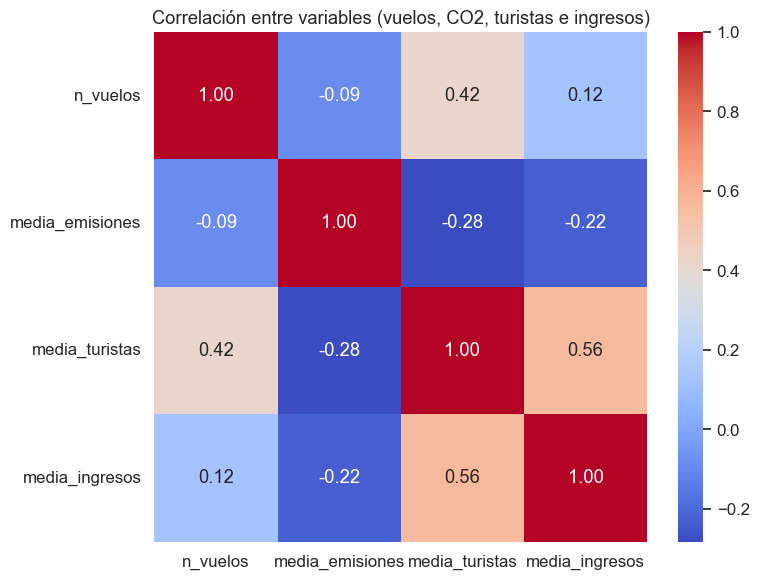

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las variables numéricas
df_corr = df_agg[["n_vuelos", "media_emisiones", "media_turistas", "media_ingresos"]]

# Mapa de calor de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables (vuelos, CO2, turistas e ingresos)")
plt.tight_layout()
plt.show()


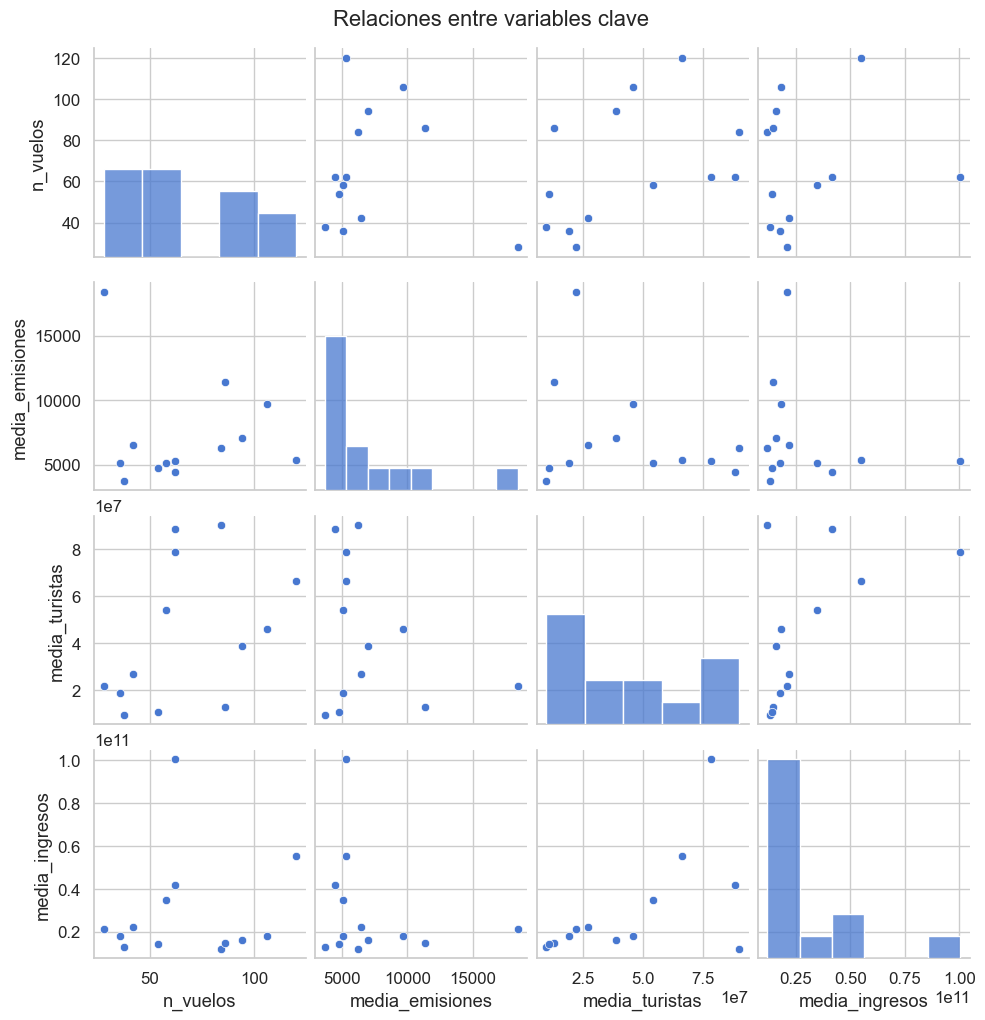

In [42]:
# Pairplot para relaciones cruzadas
sns.pairplot(df_corr)
plt.suptitle("Relaciones entre variables clave", y=1.02)
plt.show()


### Eficiencia Climática del turismo 

In [43]:
# Crear nueva columna con emisiones por cada millón de USD generados en turismo
df_agg["co2_por_millon_usd"] = df_agg["media_emisiones"] / (df_agg["media_ingresos"] / 1e6)

# Ordenar de menos a más (más eficiente a menos eficiente)
df_eficiencia = df_agg.sort_values("co2_por_millon_usd")

# Mostrar los más eficientes
df_eficiencia[["media_emisiones", "media_ingresos", "co2_por_millon_usd"]].head(10)


,media_emisiones,media_ingresos,co2_por_millon_usd
pais_vuelos,,,
ITALIA,5317.53,1.005657e+11,0.052876
ESPAÑA,5325.22,5.515891e+10,0.096543
ALEMANIA,4464.09,4.183859e+10,0.106698
FRANCIA,5113.45,3.456790e+10,0.147925
PAÍSES BAJOS,5142.96,1.800000e+10,0.285720
AUSTRALIA,3729.82,1.300000e+10,0.286909
PORTUGAL,6494.52,2.200000e+10,0.295205
SUIZA,4771.60,1.400000e+10,0.340829
REINO UNIDO,7033.05,1.617943e+10,0.434691


### Clustering Perfiles Turísticos Sostenibles o Emisivos

c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


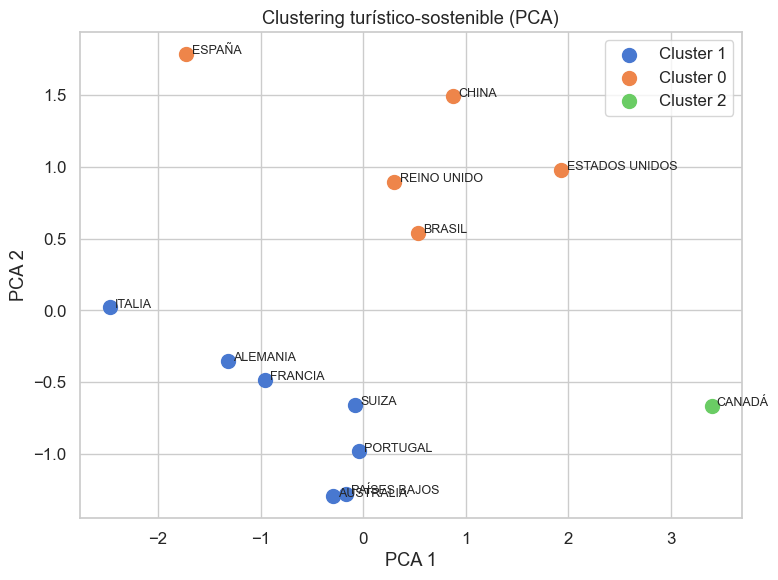

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selección de variables para clustering
X = df_agg[["n_vuelos", "media_emisiones", "media_ingresos", "co2_por_millon_usd"]]

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering KMeans (elegimos K=3 por simplicidad, puedes ajustar)
kmeans = KMeans(n_clusters=3, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_agg["PCA1"] = X_pca[:, 0]
df_agg["PCA2"] = X_pca[:, 1]

# Visualización
plt.figure(figsize=(8,6))
for c in df_agg["cluster"].unique():
    sub = df_agg[df_agg["cluster"] == c]
    plt.scatter(sub["PCA1"], sub["PCA2"], label=f"Cluster {c}", s=100)

for i, row in df_agg.iterrows():
    plt.text(row["PCA1"]+0.05, row["PCA2"], i, fontsize=9)

plt.title("Clustering turístico-sostenible (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


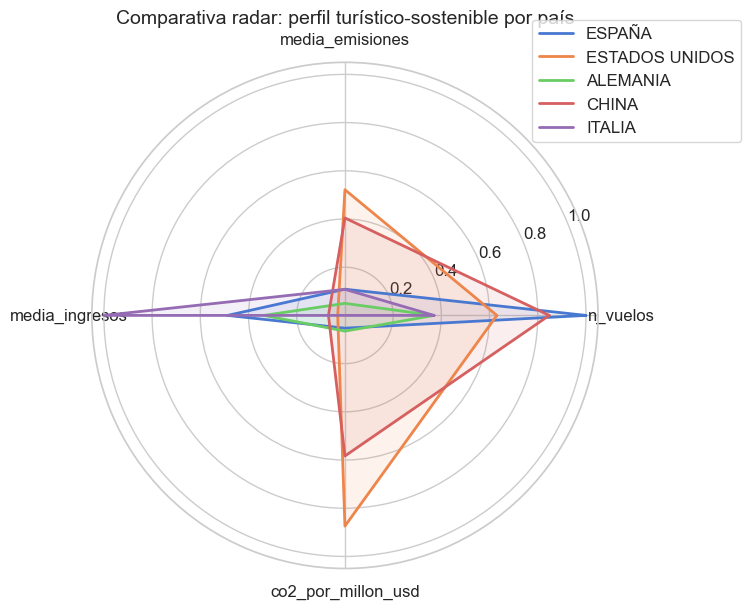

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Variables a comparar
variables = ["n_vuelos", "media_emisiones", "media_ingresos", "co2_por_millon_usd"]

# Normalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_radar = pd.DataFrame(scaler.fit_transform(df_agg[variables]), 
                        columns=variables, index=df_agg.index)

# Elegir países a comparar
paises_a_comparar = ["ESPAÑA", "ESTADOS UNIDOS", "ALEMANIA", "CHINA", "ITALIA"]
df_radar_selec = df_radar.loc[paises_a_comparar]

# Radar
labels = variables
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar círculo

# Plot
plt.figure(figsize=(8, 8))
for pais in df_radar_selec.index:
    valores = df_radar_selec.loc[pais].tolist()
    valores += valores[:1]
    plt.polar(angles, valores, label=pais, linewidth=2)
    plt.fill(angles, valores, alpha=0.1)

plt.xticks(angles[:-1], labels, fontsize=12)
plt.title("Comparativa radar: perfil turístico-sostenible por país", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


### Ranking de Eficiencia Climática 

In [48]:
# Ordenar por eficiencia: menos CO2 por ingreso → más sostenible
ranking_eficiencia = df_agg[["media_emisiones", "media_ingresos", "co2_por_millon_usd"]] \
    .sort_values("co2_por_millon_usd") \
    .reset_index()

# Añadir posición en el ranking
ranking_eficiencia["ranking_eficiencia"] = ranking_eficiencia.index + 1

# Mostrar las primeras filas
ranking_eficiencia[["ranking_eficiencia", "pais_vuelos", "co2_por_millon_usd"]].head(13)


,ranking_eficiencia,pais_vuelos,co2_por_millon_usd
0,1,ITALIA,0.052876
1,2,ESPAÑA,0.096543
2,3,ALEMANIA,0.106698
3,4,FRANCIA,0.147925
4,5,PAÍSES BAJOS,0.285720
5,6,AUSTRALIA,0.286909
6,7,PORTUGAL,0.295205
7,8,SUIZA,0.340829
8,9,REINO UNIDO,0.434691
9,10,BRASIL,0.519310
